In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/home/sam/data/d4d/CO-clean.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('''There are {} rows.'''.format(df.shape[0],))

pd.set_option('display.max_columns', 50)
df.head()

There are 2584744 rows.


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,vehicle_type,out_of_state
0,CO-2010-000001,CO,2010-01-01,00:00,10.0,Arapahoe County,8005.0,289,Golden,F,1990-05-06,19.0,W,White,Vehicle Had (Defective/No) Stop Light(s),Lights,False,NaN,NaN,False,Verbal Warning,False,1024976.0,M,NA NA 0,False
1,CO-2010-000002,CO,2010-01-01,00:01,4.0,El Paso County,8041.0,3,Colorado Springs,F,1993-07-30,16.0,W,White,Speeding (5-9 MPH Over Prima Facie Limit *),Speeding,False,NaN,NaN,False,Verbal Warning,False,1069803.0,NaN,NA NA 0,False
2,CO-2010-000003,CO,2010-01-01,00:01,24.0,Garfield County,8045.0,3,Glenwood Springs,M,1949-01-28,60.0,W,White,Failed to Drive in Single Lane (Weaving),Safe movement,False,NaN,NaN,False,Verbal Warning,False,1198321.0,M,NA NA 0,False
3,CO-2010-000004,CO,2010-01-01,00:02,19.0,Yuma County,8125.0,NaN,Sterling,M,1979-11-30,30.0,W,White,Drove (Motor/Off-highway) Vehicle When License...,License,False,NaN,NaN,False,Citation,False,1167059.0,NaN,Ford F-250 2003,False
4,CO-2010-000005,CO,2010-01-01,00:02,11.0,Jefferson County,8059.0,NaN,6A,F,1990-01-16,19.0,H,Hispanic,Operated Vehicle With Defective Headlamps,Lights,False,NaN,NaN,False,Written Warning,False,1300790.0,NaN,Oldsmobile Intrigue 1999,False


It's weird that `stop_outcome` is a variable and is populated, because on the project website the `Stop Outcome` column is unchecked for Colorado.

In [5]:
df.stop_outcome.value_counts()

Citation           571111
Verbal Warning     467170
Written Warning    221422
Arrest              36599
Name: stop_outcome, dtype: int64

In [7]:
df.search_conducted.value_counts()

False    2575920
True        8824
Name: search_conducted, dtype: int64

In [8]:
df.police_department.value_counts()

Golden              283503
Colorado Springs    214858
Glenwood Springs    178025
Pueblo              168734
Castle Rock         162683
Commerce City       161068
Sterling            137091
Durango             134750
Florence            130982
Montrose            129631
Evans               118685
Fort Collins        118136
Craig               105309
Alamosa              98633
Lamar                93687
Fruita               88922
6A                   83547
6B                   54589
6C                   47693
6D                   24048
Central City         17995
Limon                 7938
Lakewood              6567
Denver                4734
10M                   3667
8g                     910
Centennial             876
6D Ga                  565
6Z                     480
6B3                    398
IEU                    281
6A Ga                  254
2D3                    183
4C2                    135
6B 3                    50
Broomfield              50
4B2                     46
C

In [6]:
boulder_df = df[df['county_name'] == 'Boulder County']

boulder_df.police_department.value_counts()

6C                  43221
Commerce City       30571
Evans                4282
Golden               1842
Lakewood              383
10M                   343
Denver                224
6A                    188
6D                    122
6B                    111
Fort Collins           85
Castle Rock            30
ESU                    25
Central City           17
10a                    11
Glenwood Springs        7
Craig                   7
6Z                      4
Pueblo                  3
BIU                     3
Centennial              2
Florence                2
Alamosa                 1
Name: police_department, dtype: int64

In [7]:
bpd_df = boulder_df[boulder_df.police_department == '6C']

In [8]:
bpd_df.driver_race_raw.value_counts()

W    32024
H     3303
A     1036
B      644
U      545
I       40
Name: driver_race_raw, dtype: int64

In [9]:
boulder_df.driver_race_raw.value_counts()

W     59646
H      6849
A      1304
B      1239
U       714
AP      533
Z       320
I        54
AI       14
Name: driver_race_raw, dtype: int64

In [14]:
pd.crosstab(bpd_df.driver_race_raw, bpd_df.stop_outcome).apply(lambda row: row/row.sum(), axis=1)

stop_outcome,Arrest,Citation,Verbal Warning,Written Warning
driver_race_raw,,,,
A,0.010741,0.377014,0.327605,0.284640
B,0.026362,0.381371,0.323374,0.268893
H,0.039737,0.476158,0.251900,0.232205
I,0.052632,0.315789,0.184211,0.447368
U,0.013514,0.346847,0.432432,0.207207
W,0.018565,0.391791,0.291141,0.298503


In [13]:
pd.crosstab(bpd_df.driver_race_raw, bpd_df.stop_outcome, margins=True)

stop_outcome,Arrest,Citation,Verbal Warning,Written Warning,All
driver_race_raw,,,,,
A,10,351,305,265,931
B,15,217,184,153,569
H,115,1378,729,672,2894
I,2,12,7,17,38
U,6,154,192,92,444
W,522,11016,8186,8393,28117
All,670,13128,9603,9592,32993


In [22]:
pd.crosstab(boulder_df.driver_race_raw, boulder_df.stop_outcome, margins=True)

stop_outcome,Arrest,Citation,Verbal Warning,Written Warning,All
driver_race_raw,,,,,
A,12,437,352,363,1164
B,18,257,208,243,726
H,138,1789,847,1037,3811
I,2,14,13,21,50
U,10,189,223,142,564
W,664,13640,9455,11886,35645
All,844,16326,11098,13692,41960


In [23]:
pd.crosstab(boulder_df.driver_race_raw, boulder_df.stop_outcome).apply(lambda row: row/row.sum(), axis=1)

stop_outcome,Arrest,Citation,Verbal Warning,Written Warning
driver_race_raw,,,,
A,0.010309,0.375430,0.302405,0.311856
B,0.024793,0.353994,0.286501,0.334711
H,0.036211,0.469431,0.222251,0.272107
I,0.040000,0.280000,0.260000,0.420000
U,0.017730,0.335106,0.395390,0.251773
W,0.018628,0.382662,0.265255,0.333455


In [10]:
boulder_df['year'] = boulder_df.stop_date.str.split('-').str.get(0).apply(int)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
pd.crosstab(boulder_df.year, boulder_df.stop_outcome)

stop_outcome,Arrest,Citation,Verbal Warning,Written Warning
year,,,,
2010,222,4509,2479,2763
2011,199,4030,2857,2935
2012,228,4244,3750,4027
2013,198,3543,2163,3971


In [18]:
boulder_df.violation.value_counts().head(10)

Speeding                   20693
Safe movement              10848
Other                       9139
Registration/plates         5609
Lights                      4654
Other (non-mapped)          1856
Truck                       1324
Paperwork,Speeding          1260
Equipment                    798
Paperwork,Safe movement      776
Name: violation, dtype: int64

In [25]:
boulder_search_df = boulder_df[boulder_df.search_conducted == True]
boulder_search_df.head()
pd.crosstab(boulder_search_df.driver_race, boulder_search_df.contraband_found)

contraband_found,False,True
driver_race,,
Asian,3,0
Black,4,1
Hispanic,20,11
White,48,56


In [49]:
import numpy as np

size = 10000

def bayesian_contingency_test(successes_a, failures_a, successes_b, failures_b, size=size):
    theta_a = np.random.beta(successes_a + 1, failures_a + 1, size)
    theta_b = np.random.beta(successes_b + 1, failures_b + 1, size)
    
    diff = theta_a - theta_b
    
    return theta_a, theta_b, diff

theta_a, theta_b, diff = bayesian_contingency_test(11, 20, 56, 48)

np.percentile(diff, [0.005, 0.025, 0.5, 0.975, 0.995]), np.mean(theta_a < theta_b)

(array([-0.48627866, -0.46595525, -0.40332579, -0.38815037, -0.38758407]),
 0.96430000000000005)

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

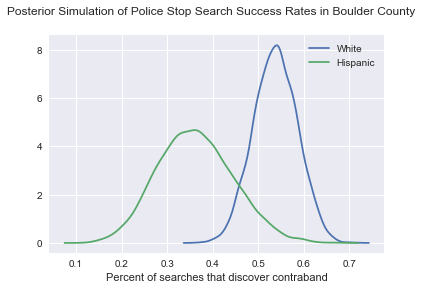

In [89]:
plt.suptitle("Posterior Simulation of Police Stop Search Success Rates in Boulder County")

plt.xlabel('Percent of searches that discover contraband')
sns.kdeplot(theta_b, label="White")
sns.kdeplot(theta_a, label="Hispanic")


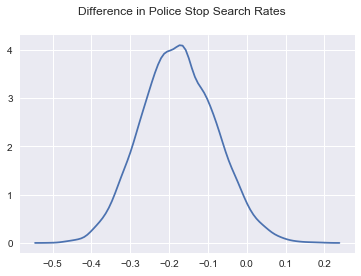

In [64]:
plt.suptitle("Difference in Police Stop Search Rates")
sns.kdeplot(diff)

# Denver Analysis

In [68]:
denver_counties = {'Denver County','Douglas County', 'Adams County', 'Arapahoe County','Jefferson County','Boulder County','Clear Creek County'}
denver_df = df[df.county_name.isin(denver_counties)]
denver_search_df = denver_df[denver_df.search_conducted == True]

In [69]:
pd.crosstab(denver_search_df.driver_race, denver_search_df.contraband_found)

contraband_found,False,True
driver_race,,
Asian,9,10
Black,64,60
Hispanic,254,170
White,380,792


In [71]:
theta_denver_search_h, theta_denver_search_w, diff_search_hw_denver = bayesian_contingency_test(170, 254, 792, 380)
theta_denver_search_b, _, diff_search_bw_denver = bayesian_contingency_test(60, 64, 792, 380)

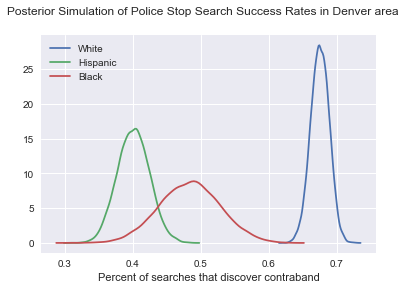

In [81]:
plt.suptitle("Posterior Simulation of Police Stop Search Success Rates in Denver area")

plt.xlabel('Percent of searches that discover contraband')
sns.kdeplot(theta_denver_search_w, label="White")
sns.kdeplot(theta_denver_search_h, label="Hispanic")
sns.kdeplot(theta_denver_search_b, label="Black")

In [88]:
print('''Probability that black people have a lower evidentiary threshold for searches than white people: {}
Mean difference theta_black - theta_white: {}

Probability that hispanic people have a lower evidentiary threshold for searches than white people: {}
Mean difference theta_hispanic - theta_white: {}

Probability that hispanic people have a lower evidentiary threshold for searches than black people: {}
Mean difference theta_hispanic - theta_black: {}
'''.format(
        np.mean(theta_denver_search_b < theta_denver_search_w),
        np.mean(diff_search_bw_denver),
        np.mean(theta_denver_search_h < theta_denver_search_w),
        np.mean(diff_search_hw_denver),
        np.mean(theta_denver_search_h < theta_denver_search_b),
        np.mean(theta_denver_search_h - theta_denver_search_b),
    ))

Probability that black people have a lower evidentiary threshold for searches than white people: 1.0
Mean difference theta_black - theta_white: -0.19144870625355728

Probability that hispanic people have a lower evidentiary threshold for searches than white people: 1.0
Mean difference theta_hispanic - theta_white: -0.27439901137640027

Probability that hispanic people have a lower evidentiary threshold for searches than black people: 0.9494
Mean difference theta_hispanic - theta_black: -0.08284430446049477



In [98]:
(np.mean(theta_denver_search_h - theta_denver_search_w) / np.mean(theta_denver_search_w),
np.mean(theta_denver_search_b - theta_denver_search_w) / np.mean(theta_denver_search_w),
np.mean(theta_denver_search_h - theta_denver_search_b) / np.mean(theta_denver_search_b))

(-0.4062442793340536, -0.28359433029207565, -0.17120181236419002)

In [103]:
theta_pct_h_w = (theta_denver_search_h - theta_denver_search_w) / (theta_denver_search_w)
theta_pct_b_w = (theta_denver_search_b - theta_denver_search_w) / (theta_denver_search_w)

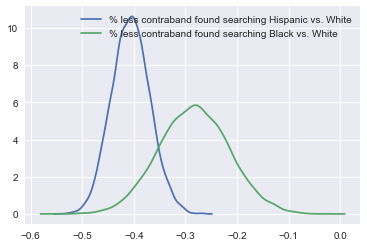

In [105]:
sns.kdeplot(theta_pct_h_w, label='% less contraband found searching Hispanic vs. White')
sns.kdeplot(theta_pct_b_w, label='% less contraband found searching Black vs. White')

### Search conducted vs. not conducted (Denver)

In [90]:
pd.crosstab(denver_df.driver_race, denver_df.search_conducted)

search_conducted,False,True
driver_race,,
Asian,14057,19
Black,24968,125
Hispanic,83038,424
Other,269,0
White,451754,1174


In [93]:
theta_denver_search_conducted_h, theta_denver_search_conducted_w, _ = bayesian_contingency_test(424, 83038, 1174, 451754)
theta_denver_search_conducted_b, theta_denver_search_conducted_w, _ = bayesian_contingency_test(125, 24968, 1174, 451754)

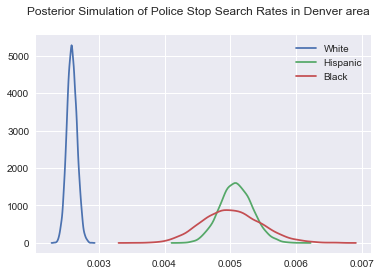

In [94]:
plt.suptitle("Posterior Simulation of Police Stop Search Rates in Denver area")

sns.kdeplot(theta_denver_search_conducted_w, label='White')
sns.kdeplot(theta_denver_search_conducted_h, label='Hispanic')
sns.kdeplot(theta_denver_search_conducted_b, label='Black')

